1. PROSES IMPORT DATA

In [21]:
#proses download library dan import library unsupervised learning

!pip install apyori

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
#memasakan file
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/bread_basket.csv")
dataframe.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [24]:
#Memproses data waktu pada dataframe menjadi per kolom
dataframe["date_time"] = pd.to_datetime(dataframe["date_time"])
dataframe['date'] = dataframe['date_time'].dt.date
dataframe['time'] = dataframe['date_time'].dt.time
dataframe['month'] = dataframe['date_time'].dt.month

dataframe.head()

<ipython-input-24-066f5f7763df>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataframe["date_time"] = pd.to_datetime(dataframe["date_time"])


,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10


In [25]:
#Mengubah format bulan dalam angka menjadi nama bulan serta membuat kolom khusus jam pada dataframe dari waktu yang ada diubah nama kolom"weekday_weekend" menjadi "day_type"

dataframe['month'] = dataframe['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12])
['Januari',
 'Februari',
 'Maret',
 'April',
 'Mei',
 'Juni',
 'Juli',
 'Agustus',
 'September',
 'Oktober',
 'November',
 'Desember']
dataframe['hour'] = dataframe['date_time'].dt.hour
dataframe.head()

<ipython-input-25-fc91a4c2874d>:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  dataframe['month'] = dataframe['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12])


,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,10,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10,10


In [26]:
dataframe.rename(columns={'weekday_weekend':'day_type'}, inplace = True)

In [27]:
plt.figure(figsize = (15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Top 25 Items Sold in the Bread Basket')

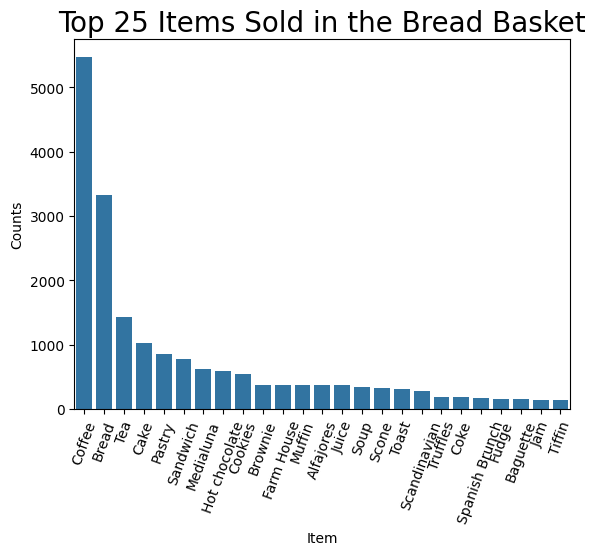

In [28]:
sns.barplot(x=dataframe.Item.value_counts().head(25).index,
             y=dataframe.Item.value_counts().head(25))

plt.xticks(rotation=70)
plt.ylabel('Counts')
plt.title('Top 25 Items Sold in the Bread Basket', fontsize = 20)

<ipython-input-29-552993327d32>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=countByHour['hour'], y =countByHour['Transaction'], palette = colors)
<ipython-input-29-552993327d32>:5: UserWarning: The palette list has more values (23) than needed (18), which may not be intended.
  sns.barplot (x=countByHour['hour'], y =countByHour['Transaction'], palette = colors)


<Axes: xlabel='hour', ylabel='Transaction'>

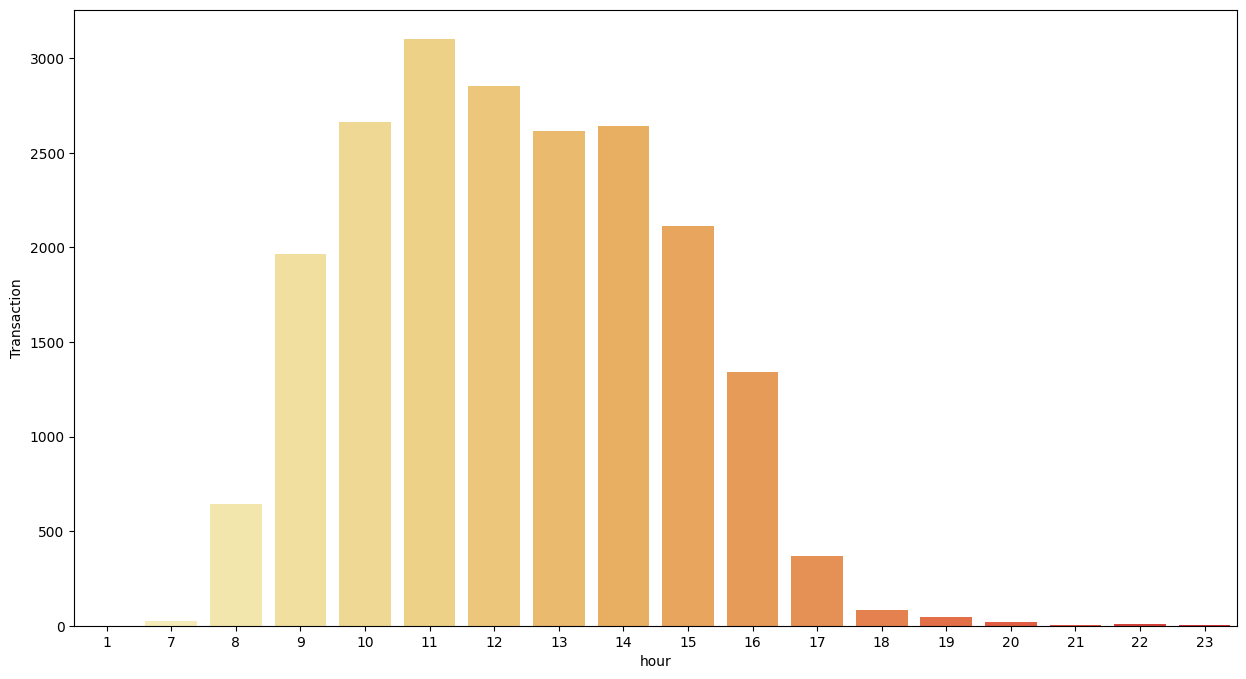

In [29]:
countByHour = dataframe.groupby('hour')['Transaction'].count().reset_index()
countByHour.sort_values('hour', inplace=True)
colors = sns.color_palette('YlOrRd', 23)
fig = plt.figure(figsize = (15,8))
sns.barplot (x=countByHour['hour'], y =countByHour['Transaction'], palette = colors)

In [30]:
transaction = dataframe.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Number of Item')
table = transaction.pivot_table(index='Transaction', columns = 'Item', values = 'Number of Item', aggfunc= 'sum').fillna(0)
def hot_encode(x):
  if x == 0:
    return False
  elif x > 0:
    return True
final_table = table.applymap(hot_encode)
final_table.head()

<ipython-input-30-bfde57c9b381>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_table = table.applymap(hot_encode)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
!pip install mlxtend

In [32]:
!pip install apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2455 sha256=5243f0cc803ab2370bc89e5eb63a415262fa9abffcf8495e0effa9793f9edd82
  Stored in directory: /root/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori


In [33]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [34]:
frequence = apriori(final_table, min_support = 0.015, use_colnames=True)
rules = association_rules(frequence, metric = 'lift', min_threshold=1)
rules.sort_values('confidence', ascending= False, inplace= True)
round(rules,2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(Toast),(Coffee),0.03,0.48,0.02,0.70,1.47,0.01,1.76,0.33
17,(Medialuna),(Coffee),0.06,0.48,0.04,0.57,1.19,0.01,1.21,0.17
21,(Pastry),(Coffee),0.09,0.48,0.05,0.55,1.15,0.01,1.16,0.15
1,(Alfajores),(Coffee),0.04,0.48,0.02,0.54,1.13,0.00,1.14,0.12
14,(Juice),(Coffee),0.04,0.48,0.02,0.53,1.12,0.00,1.12,0.11
23,(Sandwich),(Coffee),0.07,0.48,0.04,0.53,1.11,0.00,1.12,0.11
7,(Cake),(Coffee),0.10,0.48,0.05,0.53,1.10,0.01,1.10,0.10
25,(Scone),(Coffee),0.03,0.48,0.02,0.52,1.09,0.00,1.09,0.09
10,(Cookies),(Coffee),0.05,0.48,0.03,0.52,1.08,0.00,1.08,0.08
13,(Hot chocolate),(Coffee),0.06,0.48,0.03,0.51,1.06,0.00,1.06,0.06


In [35]:
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
G = nx.DiGraph()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
node_attributes = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


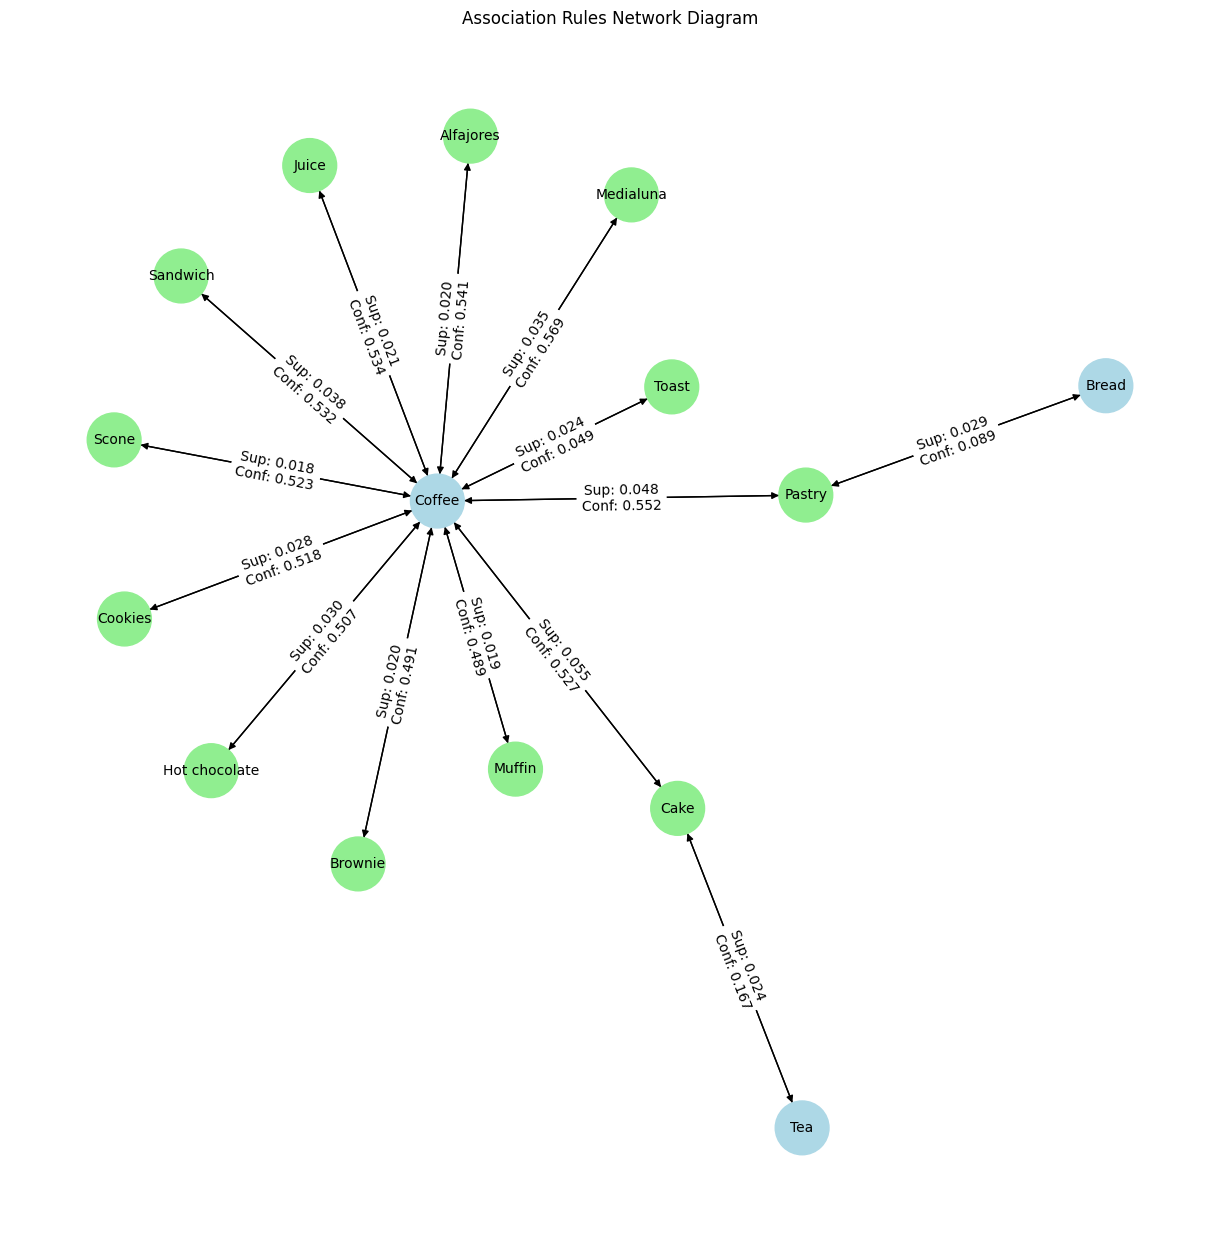

In [39]:
G = nx.DiGraph()

node_attributes = {}

for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])

    for antecedent in antecedents:
        G.add_node(antecedent, node_type='antecedent')
        node_attributes[antecedent] = {'node_type': 'antecedent'}

    for consequent in consequents:
        G.add_node(consequent, node_type='consequent')
        node_attributes[consequent] = {'node_type': 'consequent'}

    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, support=row['support'], confidence=row['confidence'])

nx.set_node_attributes(G, node_attributes)

pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(12, 12))
node_colors = ['lightblue' if G.nodes[node]['node_type'] == 'antecedent' else 'lightgreen' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=1500, node_color=node_colors, font_size=10)
edge_labels = {(edge[0], edge[1]): f"Sup: {G.edges[edge]['support']:.3f}\nConf: {G.edges[edge]['confidence']:.3f}" for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Association Rules Network Diagram")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
